In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Mall_customers.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


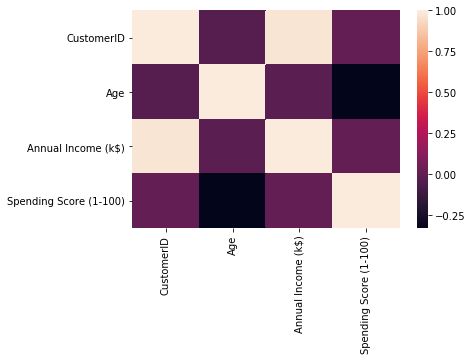

In [5]:
sns.heatmap(df.corr())

In [6]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.drop(['CustomerID','Genre','Age'],axis=1,inplace=True)

In [8]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
df.corr

<bound method DataFrame.corr of      Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
5                    17                      76
6                    18                       6
7                    18                      94
8                    19                       3
9                    19                      72
10                   19                      14
11                   19                      99
12                   20                      15
13                   20                      77
14                   20                      13
15                   20                      79
16                   21                      35
17                   21                      66
18                   23                      29
19      

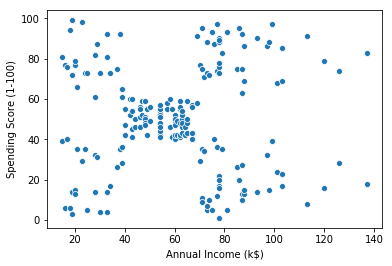

In [10]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)

In [11]:
from sklearn.cluster import KMeans

In [12]:
km=KMeans(n_clusters=200)

In [13]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=200, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [14]:
km.inertia_# jitne jyada clusters utni value kam..or if clusters=200 then inertia=0

0.0

In [15]:
km.cluster_centers_

array([[ 62.,  41.],
       [ 78.,  90.],
       [ 25.,  73.],
       [ 88.,  13.],
       [ 34.,  17.],
       [ 40.,  47.],
       [120.,  79.],
       [103.,  23.],
       [ 54.,  52.],
       [ 85.,  75.],
       [ 21.,  35.],
       [ 71.,   9.],
       [ 29.,  87.],
       [ 25.,   5.],
       [103.,  85.],
       [137.,  18.],
       [ 65.,  48.],
       [ 42.,  60.],
       [ 71.,  75.],
       [ 79.,  35.],
       [103.,  69.],
       [ 78.,  16.],
       [ 49.,  55.],
       [ 23.,  98.],
       [ 63.,  52.],
       [113.,   8.],
       [ 93.,  90.],
       [ 38.,  35.],
       [ 16.,  77.],
       [ 19.,  14.],
       [ 85.,  26.],
       [ 54.,  44.],
       [137.,  83.],
       [ 48.,  47.],
       [ 99.,  39.],
       [ 65.,  59.],
       [ 87.,  63.],
       [ 78.,  78.],
       [ 81.,   5.],
       [126.,  28.],
       [ 71.,  95.],
       [ 57.,  58.],
       [ 37.,  75.],
       [ 18.,   6.],
       [ 39.,  28.],
       [ 38.,  92.],
       [113.,  91.],
       [ 28.,

In [16]:
wcss=[]
for i in range(1,31):
    km=KMeans(n_clusters=i)
    km.fit(df)
    wcss.append(km.inertia_)

In [17]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30566.451130251862,
 25011.83934915659,
 21818.114588452183,
 19669.710998301216,
 17508.97057740007,
 15837.476810527598,
 14562.723918270218,
 13256.468420709725,
 11887.484021071521,
 11065.254761545642,
 10156.829353979354,
 9241.56510989011,
 8612.410358415531,
 8060.982734487734,
 7749.7770290167355,
 7073.03502053502,
 6675.953628316129,
 6537.40112051691,
 6012.390904385469,
 5708.432938740004,
 5374.864211706803,
 5043.177489177489,
 4968.714292651793,
 4625.824787957141]

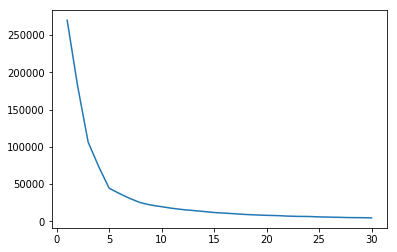

In [18]:
plt.plot(range(1,31),wcss)

In [21]:
km=KMeans(n_clusters=5) #clusters=5 bcoz there are 200 rows
clusters=km.fit_predict(df)

In [22]:
df['clusters']=clusters

In [23]:
df.head()

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,4
1,15,81,1
2,16,6,4
3,16,77,1
4,17,40,4


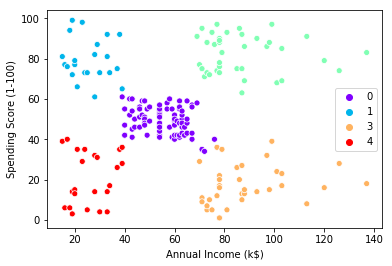

In [26]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df,hue=clusters, palette='rainbow')

In [30]:
dmap={0:'medium AI,medium SS',1:'low AI,high SS',2:'high AI,high SS',3:'high AL,low SS',4:'low AI,low SS'}

In [31]:
df['clusters']=df['clusters'].map(dmap)

In [32]:
df

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,"low AI,low SS"
1,15,81,"low AI,high SS"
2,16,6,"low AI,low SS"
3,16,77,"low AI,high SS"
4,17,40,"low AI,low SS"
5,17,76,"low AI,high SS"
6,18,6,"low AI,low SS"
7,18,94,"low AI,high SS"
8,19,3,"low AI,low SS"
9,19,72,"low AI,high SS"
